#  Intro

- https://radimrehurek.com/gensim
- https://radimrehurek.com/gensim/tutorial.html
- https://rare-technologies.com/word2vec-tutorial/
- https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python
 
- Quick Emample
- Corpora and Vector Spaces

### Training Word2Vec Model on English Wikipedia by Gensim
- https://github.com/attardi/wikiextractor
- https://textminingonline.com/training-word2vec-model-on-english-wikipedia-by-gensim

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Quick Example

In [15]:
from gensim import models

corpus = [[(0, 1.0), (1, 1.0), (2, 1.0)],
           [(2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (8, 1.0)],
           [(1, 1.0), (3, 1.0), (4, 1.0), (7, 1.0)],
           [(0, 1.0), (4, 2.0), (7, 1.0)],
           [(3, 1.0), (5, 1.0), (6, 1.0)],
           [(9, 1.0)],
           [(9, 1.0), (10, 1.0)],
           [(9, 1.0), (10, 1.0), (11, 1.0)],
           [(8, 1.0), (10, 1.0), (11, 1.0)]]

tfidf = models.TfidfModel(corpus)
doc = [(0, 1), (4, 1)]
print(tfidf[doc])

2019-06-04 18:00:06,075 : INFO : collecting document frequencies
2019-06-04 18:00:06,076 : INFO : PROGRESS: processing document #0
2019-06-04 18:00:06,076 : INFO : calculating IDF weights for 9 documents and 12 features (28 matrix non-zeros)


[(0, 0.8075244024440723), (4, 0.5898341626740045)]


### Corpora and Vector Spaces

In [32]:
from gensim import corpora

documents = ["Human machine interface for lab abc computer applications",
              "A survey of user opinion of computer system response time",
              "The EPS user interface management system",
              "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

from collections import defaultdict
frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]
# print(texts)

dictionary = corpora.Dictionary(texts)
# print(dictionary)
# print(dictionary.token2id)

2019-06-04 18:07:38,697 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-06-04 18:07:38,698 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)


In [26]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
new_vec

[(0, 1), (1, 1)]

In [30]:
corpus = [dictionary.doc2bow(text) for text in texts]
for c in corpus:
    print(c)

[(0, 1), (1, 1), (2, 1)]
[(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
[(2, 1), (5, 1), (7, 1), (8, 1)]
[(1, 1), (5, 2), (8, 1)]
[(3, 1), (6, 1), (7, 1)]
[(9, 1)]
[(9, 1), (10, 1)]
[(9, 1), (10, 1), (11, 1)]
[(4, 1), (10, 1), (11, 1)]


In [31]:
tfidf = models.TfidfModel(corpus)

2019-06-04 18:07:25,628 : INFO : collecting document frequencies
2019-06-04 18:07:25,629 : INFO : PROGRESS: processing document #0
2019-06-04 18:07:25,629 : INFO : calculating IDF weights for 9 documents and 12 features (28 matrix non-zeros)


In [34]:
print(tfidf[new_vec])
for c in corpus:
    print(tfidf[c])

[(0, 0.7071067811865476), (1, 0.7071067811865476)]
[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)]
[(0, 0.44424552527467476), (3, 0.44424552527467476), (4, 0.44424552527467476), (5, 0.3244870206138555), (6, 0.44424552527467476), (7, 0.3244870206138555)]
[(2, 0.5710059809418182), (5, 0.4170757362022777), (7, 0.4170757362022777), (8, 0.5710059809418182)]
[(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)]
[(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)]
[(9, 1.0)]
[(9, 0.7071067811865475), (10, 0.7071067811865475)]
[(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)]
[(4, 0.6282580468670046), (10, 0.45889394536615247), (11, 0.6282580468670046)]


# Word2Vec
- basic use
- Use pre-trained word embeddings
- Train Own Word Embeddings

## Visualising the Word Embeddings

In [38]:
def visualization(model, size=50):
    from sklearn.decomposition.pca import PCA
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # 支持中文
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

    vocab = list(model.wv.vocab)[:size]
    X = model[vocab]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(vocab):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()

### Basic Use

In [56]:
# 引入 word2vec
import gensim.models
from gensim.models import Word2Vec

# 引入日志配置
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# 引入数据集
sentences = ["Human machine interface for lab abc computer applications",
            "A survey of user opinion of computer system response time",
            "The EPS user interface management system",
            "System and human system engineering testing of EPS",
            "Relation of user perceived response time to error measurement",
            "The generation of random binary unordered trees",
            "The intersection graph of paths in trees",
            "Graph minors IV Widths of trees and well quasi ordering",
            "Graph minors A survey"]

# 切分词汇
sentences= [s.split() for s in sentences]

# 构建模型
model = Word2Vec(sentences, min_count=1)
print(model)

# 保存模型
model.save('XXX.model')
model.wv.save_word2vec_format('XXX.model.bin', binary=True)

# 进行相关性比较
model.similarity('Graph','System')

2019-06-04 18:29:19,264 : INFO : collecting all words and their counts
2019-06-04 18:29:19,264 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-04 18:29:19,265 : INFO : collected 45 word types from a corpus of 69 raw words and 9 sentences
2019-06-04 18:29:19,265 : INFO : Loading a fresh vocabulary
2019-06-04 18:29:19,266 : INFO : effective_min_count=1 retains 45 unique words (100% of original 45, drops 0)
2019-06-04 18:29:19,266 : INFO : effective_min_count=1 leaves 69 word corpus (100% of original 69, drops 0)
2019-06-04 18:29:19,266 : INFO : deleting the raw counts dictionary of 45 items
2019-06-04 18:29:19,267 : INFO : sample=0.001 downsamples 45 most-common words
2019-06-04 18:29:19,267 : INFO : downsampling leaves estimated 17 word corpus (24.9% of prior 69)
2019-06-04 18:29:19,267 : INFO : estimated required memory for 45 words and 100 dimensions: 58500 bytes
2019-06-04 18:29:19,268 : INFO : resetting layer weights
2019-06-04 18:29:19,271 : INFO 

Word2Vec(vocab=45, size=100, alpha=0.025)


-0.0688517

2019-06-04 18:59:04,521 : INFO : loading Word2Vec object from XXX.model
2019-06-04 18:59:04,539 : INFO : loading wv recursively from XXX.model.wv.* with mmap=None
2019-06-04 18:59:04,540 : INFO : setting ignored attribute vectors_norm to None
2019-06-04 18:59:04,541 : INFO : loading vocabulary recursively from XXX.model.vocabulary.* with mmap=None
2019-06-04 18:59:04,542 : INFO : loading trainables recursively from XXX.model.trainables.* with mmap=None
2019-06-04 18:59:04,543 : INFO : setting ignored attribute cum_table to None
2019-06-04 18:59:04,544 : INFO : loaded XXX.model


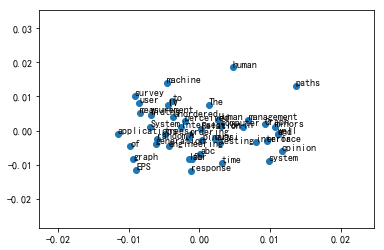

In [95]:
model = Word2Vec.load('XXX.model')
visualization(model,size=len(model.wv.vocab))

2019-06-04 18:37:09,392 : INFO : loading projection weights from XXX.model.bin
2019-06-04 18:37:09,394 : INFO : loaded (45, 100) matrix from XXX.model.bin


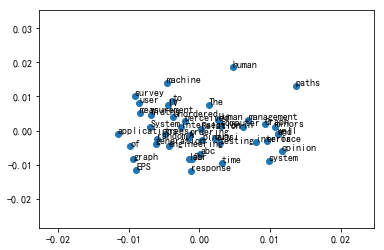

In [72]:
# Watch the encoding 
model = models.KeyedVectors.load_word2vec_format('XXX.model.bin', binary=True, unicode_errors='ignore')
visualization(model,size=len(model.wv.vocab))

### Training Loss Computation

In [71]:
# instantiating and training the Word2Vec model
model_with_loss = gensim.models.Word2Vec(sentences, min_count=1, compute_loss=True, hs=0, sg=1, seed=42)

# getting the training loss value
training_loss = model_with_loss.get_latest_training_loss()
print(training_loss)

2019-06-04 18:35:56,476 : INFO : collecting all words and their counts
2019-06-04 18:35:56,477 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-04 18:35:56,477 : INFO : collected 45 word types from a corpus of 69 raw words and 9 sentences
2019-06-04 18:35:56,478 : INFO : Loading a fresh vocabulary
2019-06-04 18:35:56,478 : INFO : effective_min_count=1 retains 45 unique words (100% of original 45, drops 0)
2019-06-04 18:35:56,479 : INFO : effective_min_count=1 leaves 69 word corpus (100% of original 69, drops 0)
2019-06-04 18:35:56,479 : INFO : deleting the raw counts dictionary of 45 items
2019-06-04 18:35:56,480 : INFO : sample=0.001 downsamples 45 most-common words
2019-06-04 18:35:56,480 : INFO : downsampling leaves estimated 17 word corpus (24.9% of prior 69)
2019-06-04 18:35:56,481 : INFO : estimated required memory for 45 words and 100 dimensions: 58500 bytes
2019-06-04 18:35:56,481 : INFO : resetting layer weights
2019-06-04 18:35:56,484 : INFO 

506.6369323730469


### Predict

In [60]:
model['machine']

array([-4.8912107e-03,  1.9244390e-03,  3.2577584e-03,  3.7667269e-03,
        4.0222807e-03,  5.9051998e-04,  1.9041896e-03,  3.7081332e-03,
       -3.3789864e-03, -1.4413007e-03, -2.6568207e-03,  1.0988398e-03,
        2.9262330e-03,  2.7889086e-04, -4.1394221e-04, -5.5181887e-04,
        4.6399361e-03, -3.9122496e-03, -4.9535936e-04, -2.0977301e-03,
       -4.3345159e-03,  2.0978614e-03,  3.2572807e-03, -2.5130659e-03,
        2.3806609e-04, -4.0233275e-03,  3.9775674e-03,  3.8552454e-03,
        3.8969521e-03, -3.3514041e-03, -9.5055241e-04,  1.3356315e-04,
        2.9965118e-03,  4.1714171e-03,  2.2855736e-03, -2.7170479e-03,
       -2.5675483e-03,  2.1787768e-03,  3.1980029e-03, -1.3137680e-03,
        2.0842336e-03, -2.9067623e-03, -2.6062659e-03, -2.4725138e-03,
        4.9578175e-03,  4.4352068e-03, -7.9336582e-04, -4.0985057e-03,
       -2.9291275e-03, -1.3738094e-03,  3.4037386e-03, -3.6507663e-03,
        2.4727863e-04,  3.8252847e-04,  1.8022641e-03, -1.8875814e-03,
      

In [76]:
model.most_similar('System')

2019-06-04 18:43:21,782 : INFO : precomputing L2-norms of word weight vectors


[('EPS', 0.17785359919071198),
 ('user', 0.14542585611343384),
 ('IV', 0.13554638624191284),
 ('intersection', 0.11313684284687042),
 ('testing', 0.1106727346777916),
 ('engineering', 0.10615579783916473),
 ('trees', 0.09807713329792023),
 ('abc', 0.0879284217953682),
 ('random', 0.08188651502132416),
 ('Relation', 0.07369805127382278)]

In [84]:
model.most_similar(positive=['machine', 'system'], negative=['user'], topn=10)
model.similarity('machine', 'user')

0.024575636

### Use pre-trained Word Embeddings

In [98]:
model_path = 'word2vec_embedding.txt'

In [ ]:
model = models.KeyedVectors.load_word2vec_format(model_path)

2019-06-04 19:04:51,042 : INFO : loading projection weights from word2vec_embedding.txt


### Evaluation Model

In [74]:
model.accuracy('../questions-words.txt')# Google 20000条: A is to B as C is to D

[{'section': 'capital-common-countries', 'correct': [], 'incorrect': []},
 {'section': 'capital-world', 'correct': [], 'incorrect': []},
 {'section': 'currency', 'correct': [], 'incorrect': []},
 {'section': 'city-in-state', 'correct': [], 'incorrect': []},
 {'section': 'family', 'correct': [], 'incorrect': []},
 {'section': 'gram1-adjective-to-adverb', 'correct': [], 'incorrect': []},
 {'section': 'gram2-opposite', 'correct': [], 'incorrect': []},
 {'section': 'gram3-comparative', 'correct': [], 'incorrect': []},
 {'section': 'gram4-superlative', 'correct': [], 'incorrect': []},
 {'section': 'gram5-present-participle', 'correct': [], 'incorrect': []},
 {'section': 'gram6-nationality-adjective', 'correct': [], 'incorrect': []},
 {'section': 'gram7-past-tense', 'correct': [], 'incorrect': []},
 {'section': 'gram8-plural', 'correct': [], 'incorrect': []},
 {'section': 'gram9-plural-verbs', 'correct': [], 'incorrect': []},
 {'section': 'total', 'correct': [], 'incorrect': []}]

### Online training / Resuming training

In [75]:
model = Word2Vec.load('XXX.model')
more_sentences = [['Advanced', 'users', 'can', 'load', 'a', 'model', 'and', 'continue', 'training', 'it', 'with', 'more', 'sentences']]
model.train(more_sentences, total_examples=model.corpus_count, epochs=model.iter)

2019-06-04 18:42:58,520 : INFO : loading Word2Vec object from XXX.model
2019-06-04 18:42:58,570 : INFO : loading wv recursively from XXX.model.wv.* with mmap=None
2019-06-04 18:42:58,571 : INFO : setting ignored attribute vectors_norm to None
2019-06-04 18:42:58,573 : INFO : loading vocabulary recursively from XXX.model.vocabulary.* with mmap=None
2019-06-04 18:42:58,575 : INFO : loading trainables recursively from XXX.model.trainables.* with mmap=None
2019-06-04 18:42:58,577 : INFO : setting ignored attribute cum_table to None
2019-06-04 18:42:58,578 : INFO : loaded XXX.model
2019-06-04 18:42:58,587 : INFO : training model with 3 workers on 45 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-06-04 18:42:58,593 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-04 18:42:58,593 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-04 18:42:58,594 : INFO : worker thread finished; awaiting finish of 0 more thre

(0, 65)

### Train Own Word Embeddings

In [85]:
import os
import jieba
from smart_open import smart_open

class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname),'r',encoding='utf-8'):
                #yield line.split() 
                yield jieba.lcut(line)#分词,如果是中文,用中文分词工具

sentences = MySentences('../corpus/')
for s in sentences:
    print(s)

# 后面同上面一样的

['怀化', '什么', '时候', '能', '有', '自己', '的', '马拉松赛', '？', '_', '都市生活', '_', '怀化', '新闻网', '\n']
['你', '希望', '怀化', '有', '自己', '的', '马拉松赛', '吗', '？', '\n']
['谈谈', '你', '的', '看法', '2012', '厦门', '国际', '马拉松', '将', '于', '1', '月', '7', '日', '举行', '厦门', '国际', '马拉松赛', '创办', '于', '2003', '年', '，', '由', '中国田径协会', '和', '厦门市', '政府', '联合', '主办', '，', '由', '中央电视台', '和', '厦门', '电视台', '联合', '直播', '，', '国内外', '40', '余家', '电视台', '转播', '。', '经过', '几年', '的', '发展', '，', '厦门', '国际', '马拉松赛', '以其', '较', '高', '的', '竞赛', '水平', '、', '广泛', '的', '群众', '参与', '和', '丰富', '的', '配套', '活动', '，', '成为', '中国', '最具', '影响力', '和', '国际', '知名度', '的', '马拉松赛', '事', '之一', '，', '2007', '年', '12', '月', '被', '国际田联', '评为', '“', '国际田联', '路', '跑', '金牌', '赛事', '”', '，', '并', '连续', '三年', '获此', '殊荣', '。', '\n']
['比赛', '时间', '：', '每年', '一月份', '的', '第一个', '星期六', ' ', '。', '2012', '年', '比赛', '时间', '为', '1', '月', '7', '日', '（', '星期六', '）', '。', '比赛项目', '：', '男', '、', '女', '：', '马拉松', '（', '42.195', '公里', '）', '、', '半程', '马拉松', '（', '21.0975', '公里', '

['据', '了解', '，', '随着', '市场', '反响', '的', '不断扩大', '，', '当当', '“', '都', '看', '”', '首发', '预售', '一', '万台', '的', '备货', '已经', '所剩无几', '。', '同时', '，', '当当网', '方面', '表示', '正在', '积极', '筹备', '补货', '，', '以', '满足', '消费者', '的', '购买', '需求', '。', '\n']
['滞销', '怀远', '石榴', '新出路', ' ', '当地', '村官', '联动', '支付宝', '微博', '叫卖', '__', '万家', '热线', '-', '安徽', '第一', '门户', '\n']
['21', '日', '，', '年轻', '的', '大学生', '村官', '胡', '文静', '多', '了', '一项', '工作', '，', '她', '坐在', '桌子', '边', '，', '赶着', '填写', '几百张', '快递', '单', '，', '忙', '也', '高兴', '着', '。', '胡', '文静', '是', '安徽省', '怀远县', '杜', '郢', '村村', '主任', '的', '助理', '，', '前', '一段时间', '，', '怀远', '的', '石榴', '销路', '不', '畅', '，', '大家', '都', '在', '积极', '地', '想着', '办法', '。', '这', '不', '，', '又', '来', '了', '一条', '新', '渠道', '，', '支付宝', '担保', '交易', '主动', '找上门', '，', '怀远', '的', '石榴', '可以', '通过', '网上', '买卖', '了', '。', '\n']
['“', '大家', '还', '记得', '前', '几天', '安徽', '怀远', '石榴', '销路', '不畅', '的', '消息', '吗', '?', '现在', '大家', '可以', '买', '到', '正宗', '、', '新鲜', '、', '好吃', '的', '怀远', '石榴', '了', '!',

### Use Glove Embedding

In [96]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = '../../../词向量Embedding/glove.6B/glove.6B.100d.txt'
word2vec_file = 'word2vec_embedding.txt'
count, dimensions = glove2word2vec(glove_file, word2vec_file)
model = models.KeyedVectors.load_word2vec_format(word2vec_file)
print(count, dimensions)

2019-06-04 19:02:50,199 : INFO : converting 400000 vectors from ../../../词向量Embedding/glove.6B/glove.6B.100d.txt to word2vec_embedding.txt
2019-06-04 19:02:54,956 : INFO : loading projection weights from word2vec_embedding.txt
2019-06-04 19:03:17,893 : INFO : loaded (400000, 100) matrix from word2vec_embedding.txt


400000 100


In [97]:
model.accuracy('../questions-words.txt')

2019-06-04 19:03:21,209 : INFO : precomputing L2-norms of word weight vectors
2019-06-04 19:03:23,139 : INFO : capital-common-countries: 94.3% (477/506)
2019-06-04 19:03:32,300 : INFO : capital-world: 89.4% (2427/2715)
2019-06-04 19:03:33,013 : INFO : currency: 17.8% (42/236)
2019-06-04 19:03:39,632 : INFO : city-in-state: 31.2% (688/2203)
2019-06-04 19:03:40,654 : INFO : family: 87.7% (300/342)
2019-06-04 19:03:43,230 : INFO : gram1-adjective-to-adverb: 22.1% (192/870)
2019-06-04 19:03:44,386 : INFO : gram2-opposite: 23.4% (89/380)
2019-06-04 19:03:48,477 : INFO : gram3-comparative: 79.4% (1057/1332)
2019-06-04 19:03:50,285 : INFO : gram4-superlative: 59.8% (359/600)
2019-06-04 19:03:53,528 : INFO : gram5-present-participle: 69.5% (646/930)
2019-06-04 19:03:57,772 : INFO : gram6-nationality-adjective: 94.9% (1371/1445)
2019-06-04 19:04:02,496 : INFO : gram7-past-tense: 55.4% (865/1560)
2019-06-04 19:04:05,844 : INFO : gram8-plural: 77.9% (823/1056)
2019-06-04 19:04:08,723 : INFO : gra

[{'section': 'capital-common-countries',
  'correct': [('ATHENS', 'GREECE', 'BAGHDAD', 'IRAQ'),
   ('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
   ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
   ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
   ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
   ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'),
   ('ATHENS', 'GREECE', 'KABUL', 'AFGHANISTAN'),
   ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
   ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
   ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'),
   ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
   ('BAGHDAD', 'IRAQ', 'BANGKOK', 'THAILAND'),
   ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA